In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)
from numpy.random import seed
seed(123)
from keras.models import Sequential
from keras.layers import Dense

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from keras.callbacks import History
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from keras.layers import Normalization

2.8.2
2.8.0


In [2]:
df = pd.read_csv('data.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,thalassemia,target
0,52,1,3,125,212,1,0.0,168,0,1.0,0,1.0,0
1,53,1,3,140,203,0,1.0,155,1,3.1,2,1.0,0
2,70,1,3,145,174,1,0.0,125,1,2.6,2,1.0,0
3,61,1,3,148,203,1,0.0,161,0,0.0,0,1.0,0
4,62,0,3,138,294,0,0.0,106,0,1.9,1,0.0,0


Model z publikacji https://www.hindawi.com/journals/jhe/2021/6260022/

In [3]:
df.drop(['fasting_blood_sugar'],axis = 1, inplace = True)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'],
                                                    test_size=0.20,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print('Train:', y_train.size, 'Val:', y_val.size,'Test:', y_test.size)

scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

Train: 656 Val: 164 Test: 205


In [5]:
class CustomEarlyStopping(keras.callbacks.Callback):
    def __init__(self, patience=0):
        super(CustomEarlyStopping, self).__init__()
        self.patience = patience
        self.best_weights = None
        
    def on_train_begin(self, logs=None):
        self.wait = 0
        self.stopped_epoch = 0
        self.best_val_loss = np.Inf
        self.best_val_acc = 0

    def on_epoch_end(self, epoch, logs=None): 
        val_loss = logs.get('val_loss')
        val_acc = logs.get('val_accuracy')

        if val_acc > 0.999:
            self.stopped_epoch = epoch
            print("Epoch ", (self.stopped_epoch + 1), ": early stopping, val acc > 0.999")
            self.model.stop_training = True
            self.best_weights = self.model.get_weights()
            self.model.set_weights(self.best_weights)

        if np.less(val_loss, self.best_val_loss):
            self.best_v_loss = val_loss
            self.best_val_acc = val_acc
            self.wait = 0
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                self.model.set_weights(self.best_weights)
                
    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch ", (self.stopped_epoch + 1), ": early stopping")

Model id:  1 batch_size:  16 callbacks:  []
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


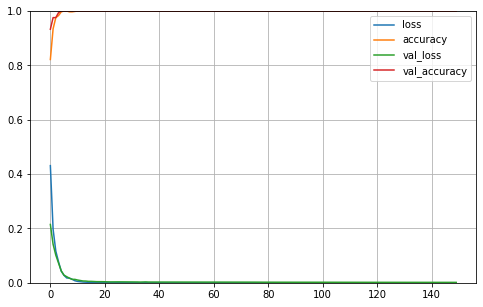

Epoch  7 : early stopping, val acc > 0.999
Epoch  7 : early stopping
Model id:  2 batch_size:  16 callbacks:  [<__main__.CustomEarlyStopping object at 0x7f55132a4a90>]
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


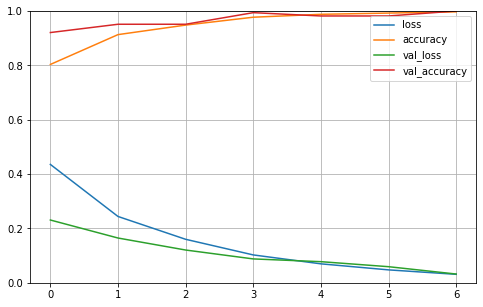

Model id:  3 batch_size:  16 callbacks:  [<keras.callbacks.EarlyStopping object at 0x7f55132a4ad0>]
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


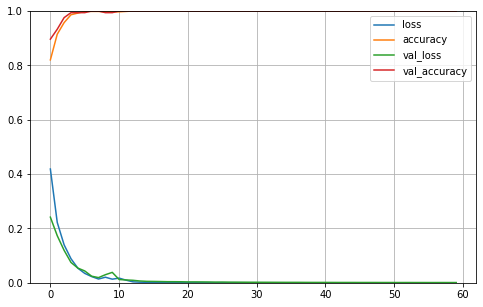

Model id:  4 batch_size:  32 callbacks:  []
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


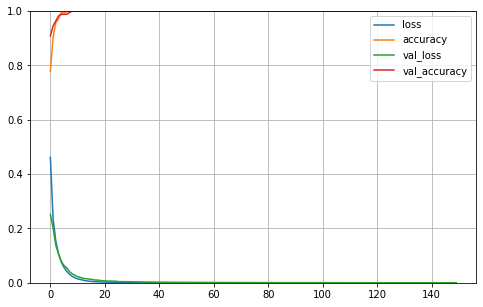

Epoch  6 : early stopping, val acc > 0.999
Epoch  6 : early stopping
Model id:  5 batch_size:  32 callbacks:  [<__main__.CustomEarlyStopping object at 0x7f55132a4a90>]
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


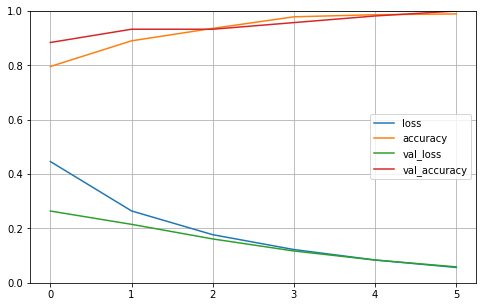

Model id:  6 batch_size:  32 callbacks:  [<keras.callbacks.EarlyStopping object at 0x7f55132a4ad0>]
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


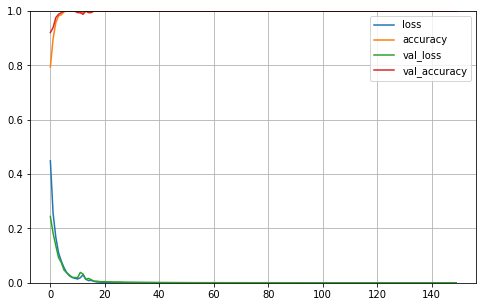

Model id:  7 batch_size:  64 callbacks:  []
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


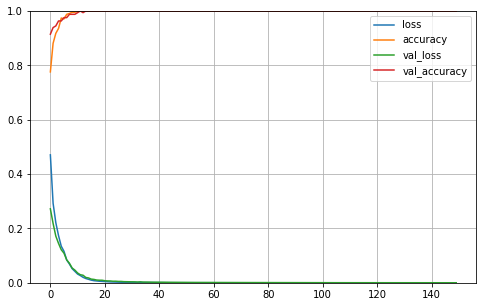

Epoch  32 : early stopping, val acc > 0.999
Epoch  32 : early stopping
Model id:  8 batch_size:  64 callbacks:  [<__main__.CustomEarlyStopping object at 0x7f55132a4a90>]
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


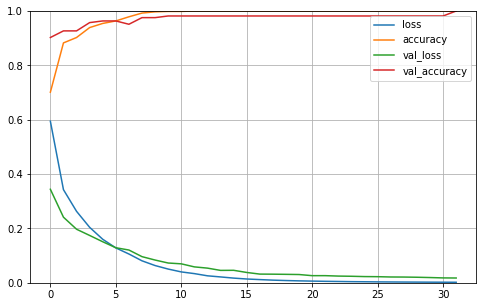

Model id:  9 batch_size:  64 callbacks:  [<keras.callbacks.EarlyStopping object at 0x7f55132a4ad0>]
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


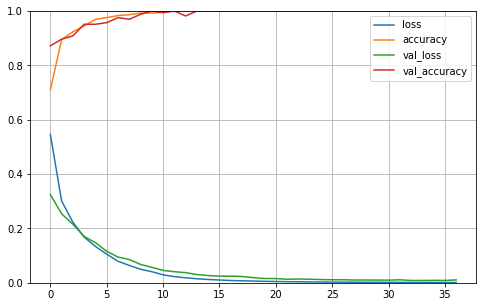

In [6]:
from sklearn import  metrics

initializer = tf.keras.initializers.HeNormal()
batch_size_list = [16, 32, 64]
callbacks_list = [[], [CustomEarlyStopping(patience=5)], [EarlyStopping(monitor='val_loss', patience=3)]]
models = []
model_id = 1
for bs in batch_size_list:
    for callbacks in callbacks_list:
      model  = Sequential([
          Dense(1024, input_shape=[X_train.shape[1]], kernel_initializer=initializer),
          Activation('relu'),
          Dense(512, kernel_initializer=initializer),
          Activation('relu'),
          Dense(256, kernel_initializer=initializer),
          Activation('relu'),
          Dense(256, kernel_initializer=initializer),
          Activation('relu'),
          Dense(128, kernel_initializer=initializer),
          Activation('relu'),
          Dense(128, kernel_initializer=initializer),
          Activation('relu'),
          Dense(32, activation='relu',kernel_initializer=initializer),
          Dense(1, activation='sigmoid'),
      ])
      Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
      model.compile(loss="binary_crossentropy", optimizer=Adam, metrics=["accuracy"])
      history = model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size=bs, epochs=150, callbacks=callbacks, verbose=0)
      models.append((model_id, model))
      y_pred = (model.predict(X_val)>0.5)
      print('Model id: ', model_id, 'batch_size: ', bs, "callbacks: ", callbacks)
      print("precision_score: {}".format(metrics.precision_score(y_val, y_pred )))
      print("recall_score: {}".format( metrics.recall_score(y_val, y_pred )))
      print("f1_score: {}".format( metrics.f1_score(y_val, y_pred)))
      print("accuracy_score: {}".format( metrics.accuracy_score(y_val, y_pred)))
      pd.DataFrame(history.history).plot(figsize=(8, 5))
      plt.grid(True)
      plt.gca().set_ylim(0, 1)
      plt.show()
      model_id+=1

In [12]:
models_ids = [2-1, 5-1, 8-1]

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in map(models.__getitem__, models_ids):
    y_pred = (model.predict(X_test)>0.5)
    precision_score.append(metrics.precision_score(y_test, y_pred))
    recall_score.append(metrics.recall_score(y_test, y_pred))
    f1_score.append( metrics.f1_score(y_test, y_pred))
    accuracy_score.append(metrics.accuracy_score(y_test, y_pred))

res_labels = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
    }
res_df = pd.DataFrame(data=res_labels)
res_df.insert(loc=0, column='Model_id', value=[model[0] for model in map(models.__getitem__, models_ids)])
def highlight_max(s):
    is_large, is_max = s.nlargest(4).values, s.nlargest(1).values
    
    return ['color: lightgreen' if v in is_max else 'color: green' if v in is_large else '' for v in s]

res_df.style.apply(highlight_max, subset=['precision_score',	'recall_score',	'f1_score','accuracy_score'])

,Model_id,precision_score,recall_score,f1_score,accuracy_score
0,2,0.990099,0.970874,0.980392,0.980488
1,5,1.000000,1.000000,1.000000,1.000000
2,8,1.000000,1.000000,1.000000,1.000000
